In [1]:
# A nice and flexible confusion matrix

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Seaborn cause white lines in the plot for some reason. Use reset_orig()
import seaborn as sns
sns.set()
sns.reset_orig()

In [4]:
# Helper function
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          figsize=(14,14)):
    '''
    MUST IMPORT:
    from sklearn.utils.multiclass import unique_labels
    from sklearn.metrics import confusion_matrix
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    MUST SET BEFORE CALLED:
    Use seaborn.reset_orig() to avoid lines in plot.
    '''
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    figsize recommendation: (fs,fs)  fs = sqrt(len(unique_labels) * 4
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Colorbar
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.figure.colorbar(im, cax=cax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    return ax

In [5]:
# Two class data
y_true = ['class_1', 'class_2', 'class_1', 'class_2', 'class_1', 'class_2']
y_pred = ['class_1', 'class_2', 'class_2', 'class_2', 'class_1', 'class_1']
fs = np.sqrt(len(unique_labels(y_true, y_pred))) * 4

Confusion matrix, without normalization
[[2 1]
 [1 2]]


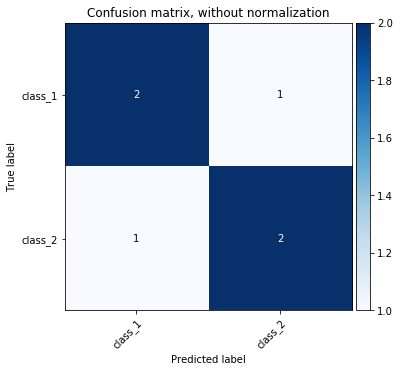

In [6]:
# Without normalization the fequency displayed
plot_confusion_matrix(y_true,
                      y_pred,
                      title='Confusion matrix, without normalization',
                      normalize=False,
                      figsize=(fs,fs))

Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.33333333 0.66666667]]


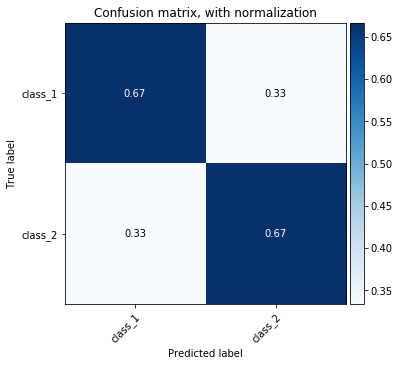

In [7]:
# With normalization the probability displayed (sum of values in a row = 1)
plot_confusion_matrix(y_true,
                      y_pred,
                      title='Confusion matrix, with normalization',
                      normalize=True,
                      figsize=(fs,fs))

Confusion matrix, without normalization
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]]


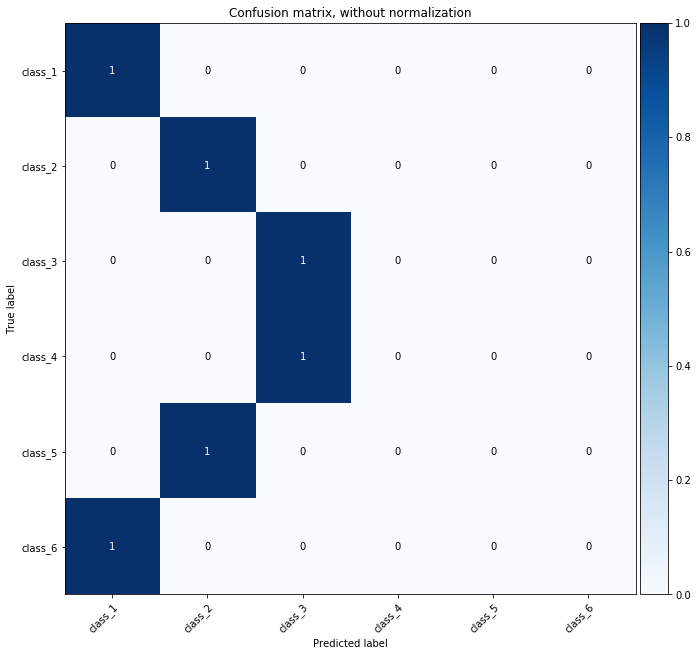

In [8]:
# Six class data to show figure scaling
y_true = ['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
y_pred = ['class_1', 'class_2', 'class_3', 'class_3', 'class_2', 'class_1']
fs = np.sqrt(len(unique_labels(y_true, y_pred))) * 4

plot_confusion_matrix(y_true,
                      y_pred,
                      title='Confusion matrix, without normalization',
                      normalize=False,
                      figsize=(fs,fs))